In [96]:
pip install yfinance                  #allow us to download the NFLX stock historical data directly to python

In [97]:
import yfinance as yfin                #allow us to import data from Yahoo Finance directly to Python
import numpy as np                     #Used for scientific computing and working with arrays 
import pandas as pd                    #used for data wrangling and analysis
import matplotlib as mplot             #cross-platform, data visualization and graphical plotting
import matplotlib.pyplot as plt        #necessary to make some change to a figure
import scipy.stats as si               #contains a large number of probability distributions, summary and frequency statistics and more

In [98]:
initial_data = yfin.download("NFLX", start="2020-10-01", end="2021-10-01")

[*********************100%***********************]  1 of 1 completed


In [99]:
initial_data.head()                    #to confirm if data is correct

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-30,492.570007,504.630005,489.269989,500.029999,500.029999,4634100
2020-10-01,506.029999,529.549988,503.600006,527.510010,527.510010,8153700
2020-10-02,516.429993,526.369995,502.700012,503.059998,503.059998,6071200
2020-10-05,506.799988,520.989990,501.700012,520.650024,520.650024,4088100
2020-10-06,518.719971,521.820007,504.160004,505.869995,505.869995,4199000


In [100]:
data = initial_data['Adj Close']       #Adjusted Close is the final price of the stock in the day, and the one we going to analyse

array([<AxesSubplot:xlabel='Date'>], dtype=object)

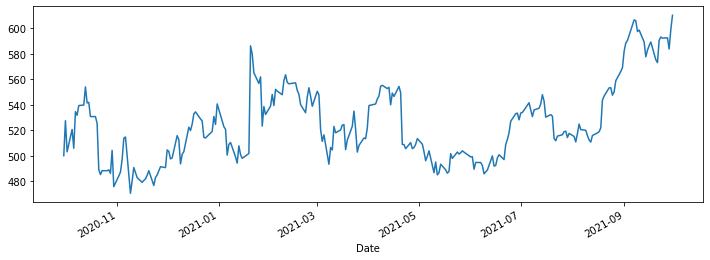

In [101]:
data.plot(figsize=(12, 4), subplots=True)

In [102]:
data.describe().round(2)

count    253.00
mean     524.61
std       30.25
min      470.50
25%      501.67
50%      519.30
75%      542.95
max      610.34
Name: Adj Close, dtype: float64

In [103]:
log_return = np.log(data / data.shift(1))                              #necessary to discover volatility

In [104]:
vol = np.sqrt(252) * log_return.std()

print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 34.87 %


In [105]:
VIX = yfin.download("^VIX", start="2020-10-01", end="2021-10-01")      #VIX=Cboe volatility index (market volatility)

[*********************100%***********************]  1 of 1 completed


In [106]:
print(VIX)

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2020-09-30  26.690001  27.120001  25.059999  26.370001  26.370001       0
2020-10-01  25.780001  27.110001  25.330000  26.700001  26.700001       0
2020-10-02  28.870001  29.900000  26.930000  27.629999  27.629999       0
2020-10-05  29.520000  29.690001  27.270000  27.959999  27.959999       0
2020-10-06  28.049999  30.000000  26.010000  29.480000  29.480000       0
...               ...        ...        ...        ...        ...     ...
2021-09-24  19.330000  20.410000  17.629999  17.750000  17.750000       0
2021-09-27  17.780001  19.320000  17.740000  18.760000  18.760000       0
2021-09-28  19.740000  24.820000  19.709999  23.250000  23.250000       0
2021-09-29  22.070000  23.790001  21.450001  22.559999  22.559999       0
2021-09-30  21.480000  24.709999  20.600000  23.139999  23.139999       0

[253 rows x 6 columns]


In [107]:
vix = VIX['Adj Close'][-1]
print('The market volatility is', round(vix,4), '%')

The market volatility is 23.14 %


In [108]:
import os                                 #provides functions for creating and removing a directory(folder)

In [109]:
data.tail()                               #The last price of the year will be our Spot Price(S0)

Date
2021-09-24    592.390015
2021-09-27    592.640015
2021-09-28    583.849976
2021-09-29    599.059998
2021-09-30    610.340027
Name: Adj Close, dtype: float64

In [110]:
S0 = 610.34              # spot stock price
K = 602                  # strike price (chosen value)
T = 1.0                  # maturity 
r = 0.155                # risk free rate 
sig = 0.3487             # volatility
N = 6                    # number of periods or number of time steps  
payoff = "call"          # payoff 

In [111]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [112]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [113]:
S

array([[ 610.34      ,  703.71423519,  811.37353738,  935.50333963,
        1078.62341836, 1243.63904366, 1433.89995487],
       [   0.        ,  529.35537889,  610.34      ,  703.71423519,
         811.37353738,  935.50333963, 1078.62341836],
       [   0.        ,    0.        ,  459.11642226,  529.35537889,
         610.34      ,  703.71423519,  811.37353738],
       [   0.        ,    0.        ,    0.        ,  398.19731242,
         459.11642226,  529.35537889,  610.34      ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
         345.36142018,  398.19731242,  459.11642226],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,  299.53620184,  345.36142018],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,  259.7914271 ]])

In [114]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.5560782144154429

In [115]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 831.89995487],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 476.62341836],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 209.37353738],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   8.34      ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ]])

In [116]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[131.70550338, 192.10706191, 273.47825446, 378.39627094,
        506.93691011, 656.99155328, 831.89995487],
       [  0.        ,  63.80779895, 101.5025342 , 158.17478268,
        239.68702913, 348.85584925, 476.62341836],
       [  0.        ,   0.        ,  20.35109643,  36.49583278,
         65.39320128, 117.06674481, 209.37353738],
       [  0.        ,   0.        ,   0.        ,   1.32713735,
          2.44905909,   4.51941952,   8.34      ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ]])

In [117]:
print('The price of the European ' + payoff + ' is', str( V[0,0]))

The price of the European call is 131.7055033776323


In [118]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [119]:
T = 1                                   # maturity
r = 0.155                               # risk free rate
sigma = 0.3487                          # volatility
S0 = 610.34                             # spot stock price
K = 602                                 # strike price (Chosen value)

In [120]:
S = mcs_simulation_np(10000)

In [122]:
S = np.transpose (S)

In [123]:
S

array([[ 610.34      ,  610.34      ,  610.34      , ...,  610.34      ,
         610.34      ,  610.34      ],
       [ 609.06928707,  612.25568447,  609.18950331, ...,  610.70025561,
         615.25389667,  611.60626905],
       [ 609.56647785,  612.98021249,  608.11912135, ...,  605.59801199,
         614.18805381,  613.2161771 ],
       ...,
       [ 703.98506535, 1269.54535298,  675.62264256, ..., 1025.25102101,
        1082.48751451,  859.47818033],
       [ 704.40538187, 1264.18762341,  672.56025486, ..., 1022.35141968,
        1078.87668496,  860.78452277],
       [ 704.12792239, 1266.54720165,  677.80227085, ..., 1020.6081039 ,
        1084.75834266,  857.37778445]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

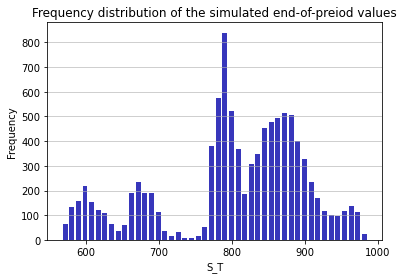

In [124]:
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.8, rwidth=0.75)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [125]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('The price of the European call is', str(c))

The price of the European call is 201.9569287122758


In [126]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
        return delta

In [127]:
delta(610.34, 602, 1, 0.0155, 0.00, 0.3487, 'call')

0.601896116466009

In [128]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 105, T[i], 0.04, 0.02, 0.3, 'call')

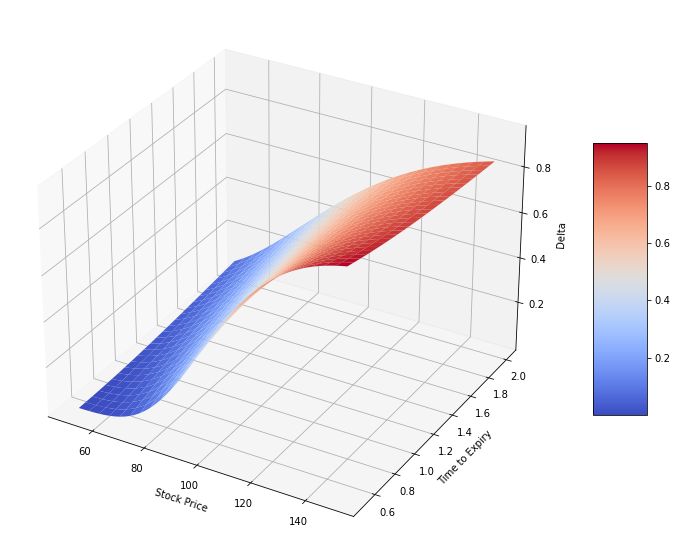

In [129]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [130]:
d = delta(610.34, 602, 1, 0.0155, 0.00, 0.3487, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.6019 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.6019 .


In [131]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [132]:
gamma(610.34, 602, 1, 0.0155, 0.00, 0.3487, 'call')

0.0018130223955688694

In [133]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 105, T[i], 0.04, 0.02, 0.3, 'call')

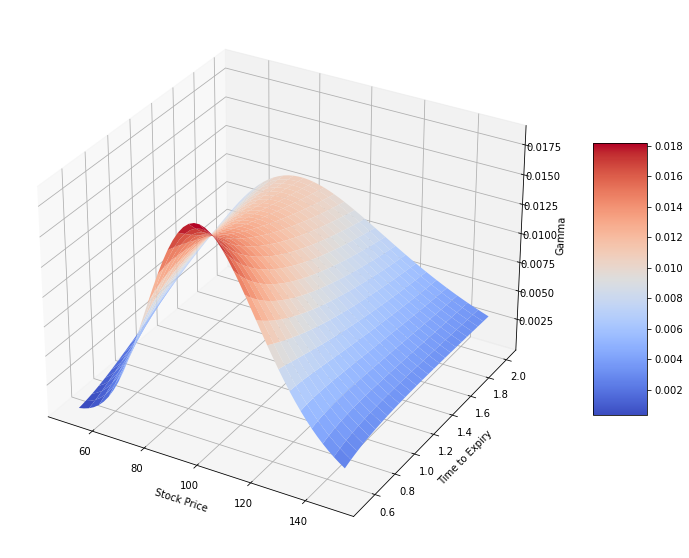

In [134]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [135]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = -(vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T))) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
        return theta

In [136]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 105, T[i], 0.04, 0.02, 0.3, 'call')

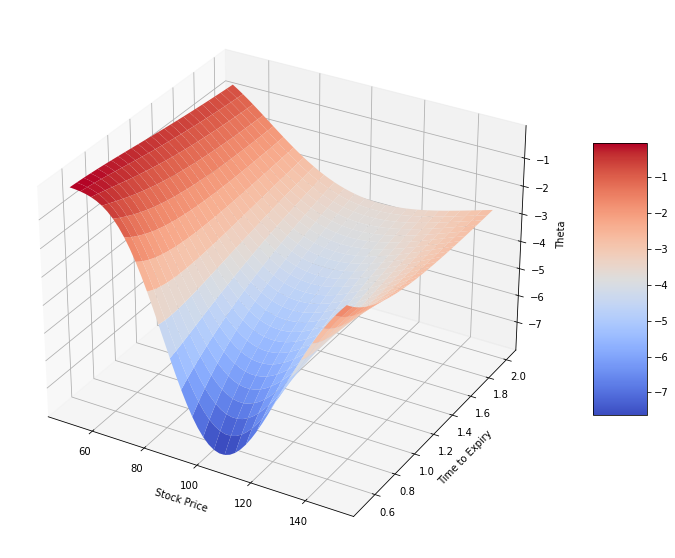

In [137]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [138]:
theta(610.34, 602, 1, 0.0155, 0.00, 0.3487, 'call')

-36.797470264216116

In [139]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [140]:
vega(610.34, 602, 1, 0.0155, 0.00, 0.3487, 'call')

235.50426838312043

In [141]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    
    return rho

In [142]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 105, T[i], 0.04, 0.02, 0.3, 'call')

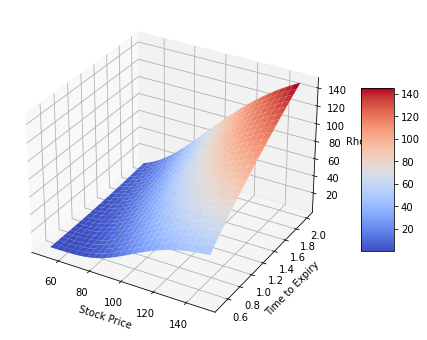

In [143]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [144]:
rho(610.34, 602, 1, 0.0155, 0.00, 0.3487, 'call')

275.01283408909256

In [145]:
S = np.linspace(50, 150, 51)                         #graphic for Vega calculated before
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 105, T[i], 0.04, 0.02, 0.3, 'call')

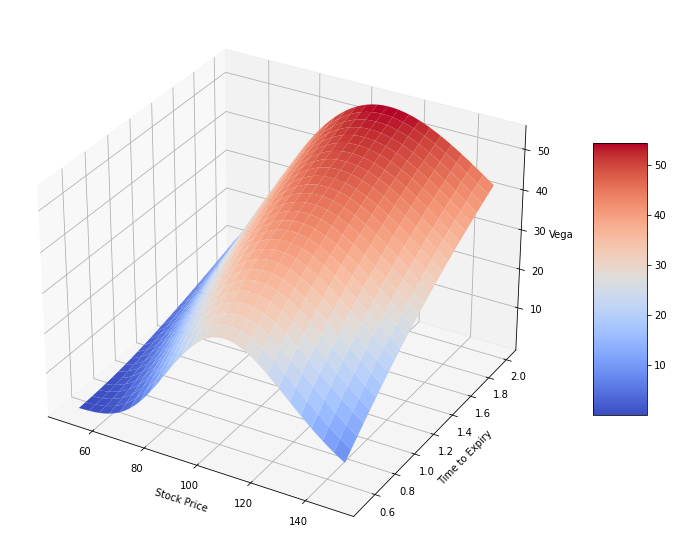

In [146]:
fig = plt.figure(figsize=(15, 10))                   #graphic for Vega calculated before
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);